# 答题卡识别

In [ ]:
import numpy as np
import cv2

import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Allow image embeding in notebook
%matplotlib inline

In [ ]:
def showImg(img, x=20, y=30):
    fig = plt.figure(figsize=(x, y))
    plt.imshow(img, cmap ='gray')
    plt.axis('off')

### 函数

## 一、切割答题区域
### 1、读入图片+预处理

(np.float64(-0.5), np.float64(1394.5), np.float64(231.5), np.float64(-0.5))

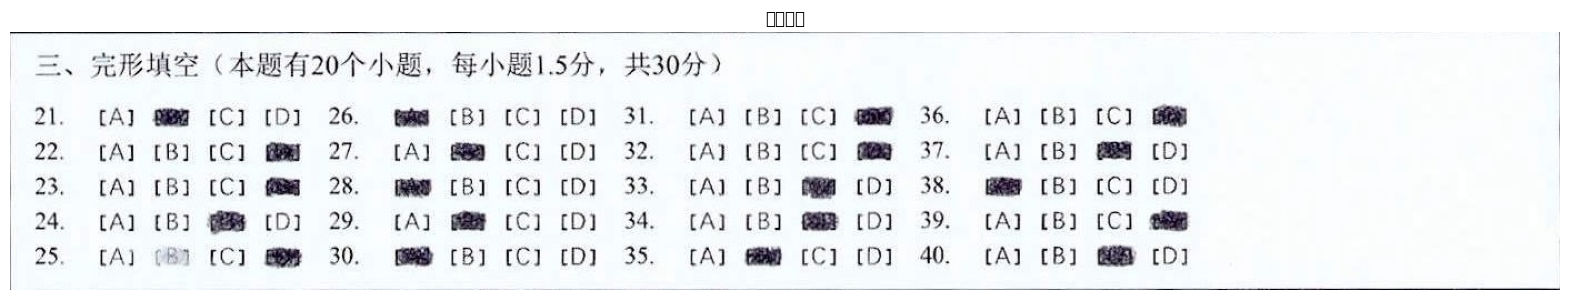

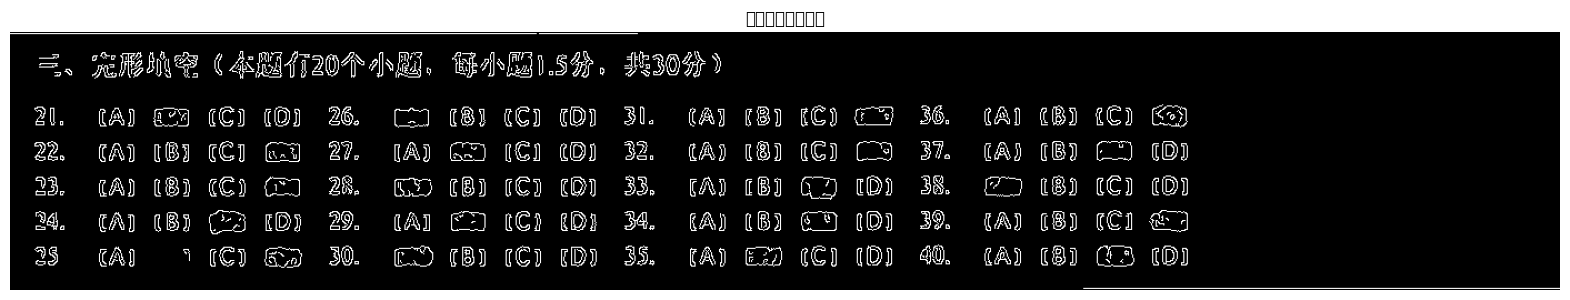

In [ ]:
from imutils import auto_canny, contours

# 【1】读入图片+预处理
image = cv2.imread('sub_answer_card_3.jpg')# 加载图片
# cv2.imshow("Original", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# 转灰度
blurred = cv2.GaussianBlur(gray, (5, 5), 0)# 高斯模糊

# kernel = np.ones((3, 3), np.uint8)
# blurred = cv2.erode(blurred, kernel, iterations=1) #腐蚀
# blurred = cv2.dilate(blurred, kernel, iterations=2) #膨胀
# blurred = cv2.erode(blurred, kernel, iterations=1) #腐蚀
# blurred = cv2.dilate(blurred, kernel, iterations=2) #膨胀

# edged = cv2.Canny(blurred, 75, 200)# 边缘检测
edged = auto_canny(blurred) # 边缘检测

# fig = plt.figure(figsize=(15, 10))
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))#plt显示是RGB顺序
# plt.axis('off')
# plt.subplot(1, 2, 2)
# plt.imshow(edged,cmap ='gray')
# plt.axis('off')

fig = plt.figure(figsize=(20, 30))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(u"原始图片")
plt.axis('off')

fig = plt.figure(figsize=(20, 30))
plt.imshow(edged, cmap ='gray')
plt.title(u"边缘检测后的图片")
plt.axis('off')

#  黑底白字  白底黑字

(np.float64(-0.5), np.float64(1394.5), np.float64(231.5), np.float64(-0.5))

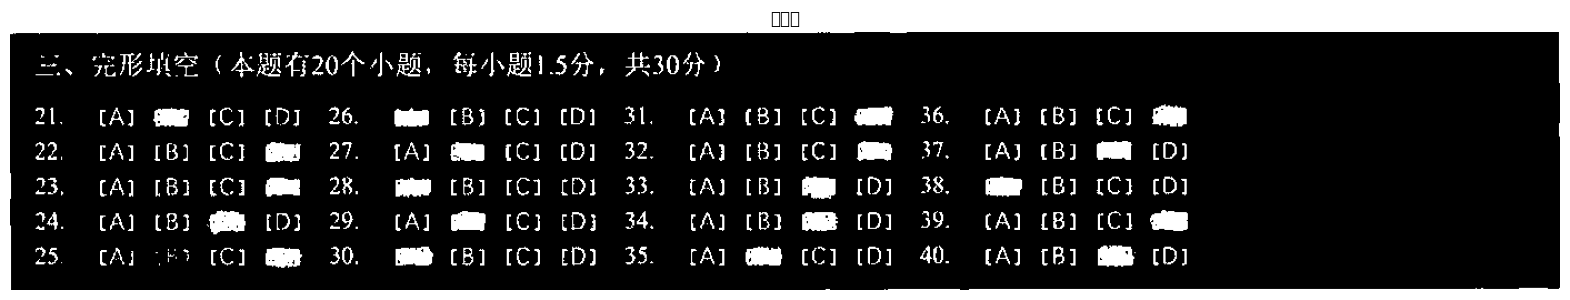

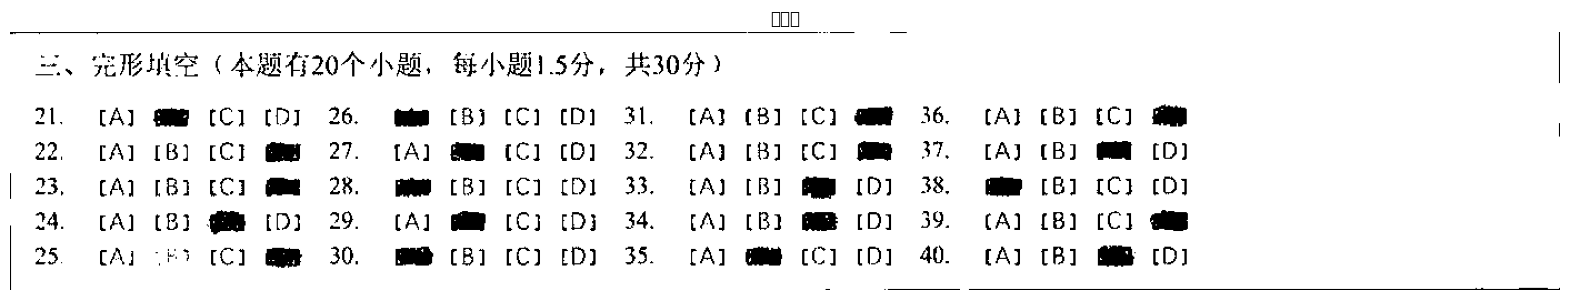

In [ ]:
# 黑底白字
thresh_option_answer = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
fig = plt.figure(figsize=(20, 30))
plt.imshow(thresh_option_answer, cmap ='gray')
plt.title(u'二值图')
plt.axis('off')


# 白底黑字
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
fig = plt.figure(figsize=(20, 30))
plt.imshow(binary, cmap ='gray')
plt.title(u'二值图')
plt.axis('off')

In [ ]:
import cv2
from cnocr import CnOcr
ocr = CnOcr()

In [ ]:
!pip install cnocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.6/224.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.4/253.4 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 验证pytesseract的数字识别结果

In [ ]:
import pytesseract
from pytesseract import Output

# for i in range(1,10) :
image = cv2.imread('111.jpg')# 加载图片
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# 转灰度
# # ret, image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# # kernel = np.ones((2, 2), np.uint8)
# # dilate_choice_answer = cv2.dilate(binary, kernel, iterations=1)
# # dilate_choice_answer = cv2.erode(binary, kernel, iterations=1)

fig = plt.figure(figsize=(5, 10))
plt.imshow(image, cmap ='gray')
plt.axis('off')

dd = pytesseract.image_to_data(image, output_type=Output.DICT, lang='chi_sim')
print('ocr:', dd['text'] , '===')

res = ocr.ocr_for_single_line(image)
print(res)


ModuleNotFoundError: No module named 'pytesseract'

['', '', '', '', ' ', '', '', '', 'CANE', '(P20D', 'Dae.', 'BE', 'RIIS.', 'JR307)', '', '', '', ' ', '', '', '', 'fA)', 'pe', '107', '191', '26.', 'we', 'CB]', '1C]', '(DP', '31', 'fA)', 'B20)', 'al', '36', 'CAT', 'TBC]', 'Ba', '', 'CAT', 'CB]', 'CC]', 'mid', '27.', 'CA)', 'MMM', 'CC)', '(D2', '32.', '(A', '1B)', 'CC]', 'mm', '37.', 'CA)', 'CB)', 'am', '(DI', '', 'CA]', 'C81', 'CC)', 'ea', '28.', 'BE', 'CB]', 'EC)', '(D7', '33.', 'CAD', 'FB', 'Oa', 'CD)', '38.', 'Be', 'BI', 'CCI', 'cDI', '', 'TA]', '(6)', 'Be', '0]', '29.', 'CA]', 'AM', 'CC)', 'ID]', '4.', 'TAD', 'LB', '1D]', '3%', '[TA]', '[6]', '(C)', 'sa', '', 'LAI', 'CC]', 'Bm', '30,', 'BTC)', '(Dy', '35.', 'CAD', 'se', 'eC', '097', '40.', 'CAT', '1B)', 'ea', '07']
['', '', '', '', ' ', '', '', '', 'CANE', '(P20D', 'Dae.', 'BE', 'RIIS.', 'JR307)', '', '', '', ' ', '', '', '', 'fA)', 'pe', '107', '191', '26.', 'we', 'CB]', '1C]', '(DP', '31', 'fA)', 'B20)', 'al', '36', 'CAT', 'TBC]', 'Ba', '', 'CAT', 'CB]', 'CC]', 'mid', '27.', 'CA)

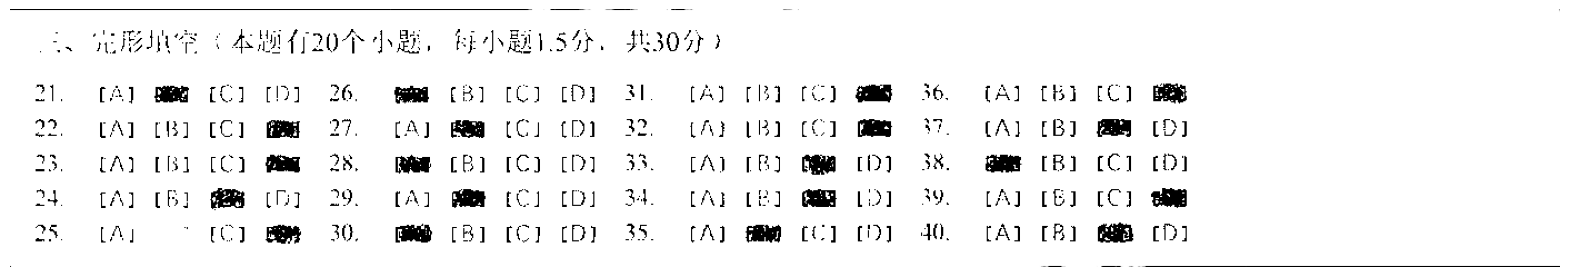

In [ ]:
import pytesseract
from PIL import ImageEnhance
from PIL import Image
from pytesseract import Output

# img = cv2.imread('20210625171030.jpg')# 加载图片
img = Image.open('sub_answer_card_3.jpg')
img = img.convert('RGB')  #这里也可以尝试使用L
enhancer = ImageEnhance.Color(img)
enhancer = enhancer.enhance(0)
enhancer = ImageEnhance.Brightness(enhancer)
enhancer = enhancer.enhance(2)
enhancer = ImageEnhance.Contrast(enhancer)
enhancer = enhancer.enhance(8)
enhancer = ImageEnhance.Sharpness(enhancer)
img = enhancer.enhance(20)
fig = plt.figure(figsize=(20, 30))
plt.imshow(img, cmap ='gray')
plt.axis('off')

#dd = pytesseract.image_to_data(img, output_type=Output.DICT, lang = 'eng1')
#print(dd['text'])

dd = pytesseract.image_to_data(img, output_type=Output.DICT, lang = 'eng')
print(dd['text'])

dd = pytesseract.image_to_data(img, output_type=Output.DICT)
print(dd['text'])

In [ ]:
!pip install pytesseract

---------------------------------------------------------------------

## 二、选择题自动批改
### 2、提取选择题候选区域

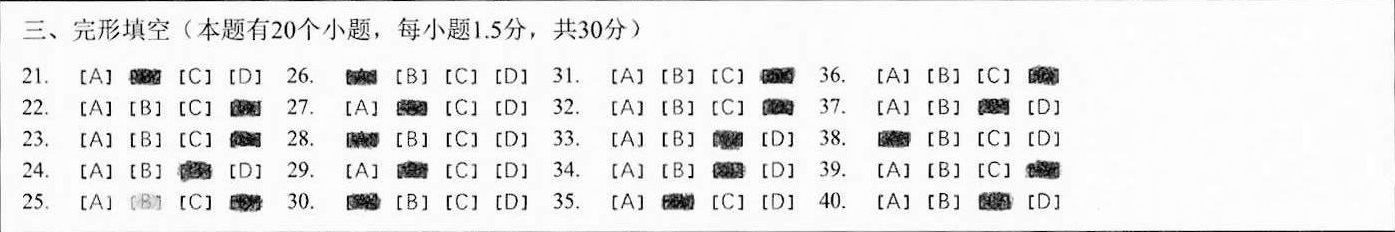

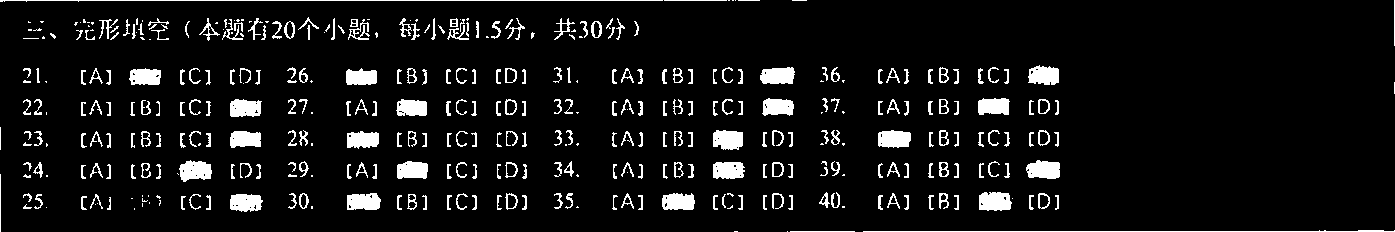

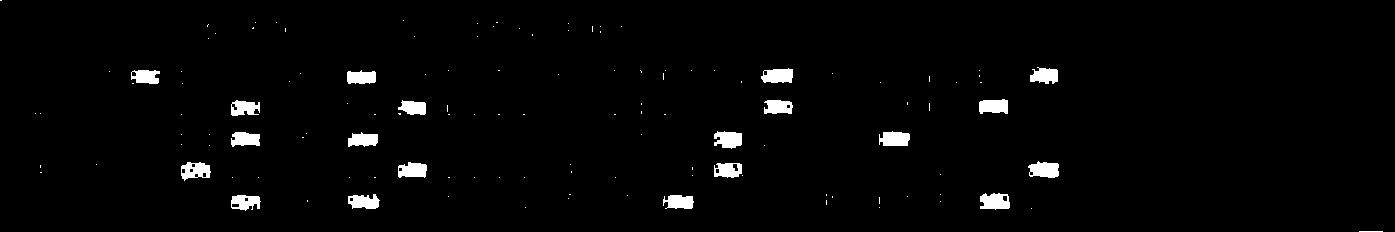

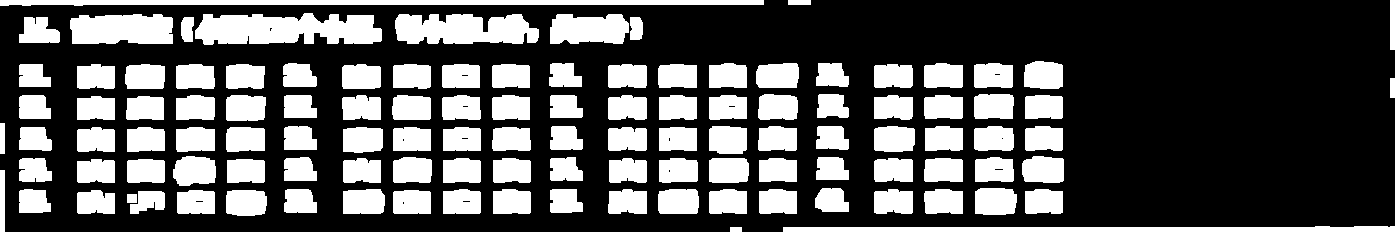

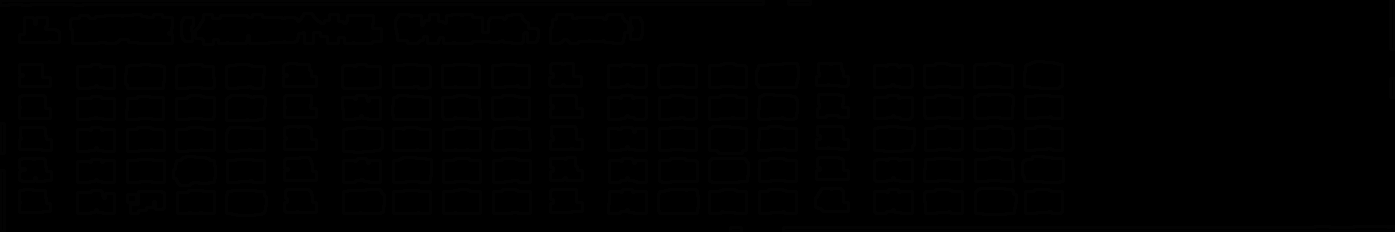

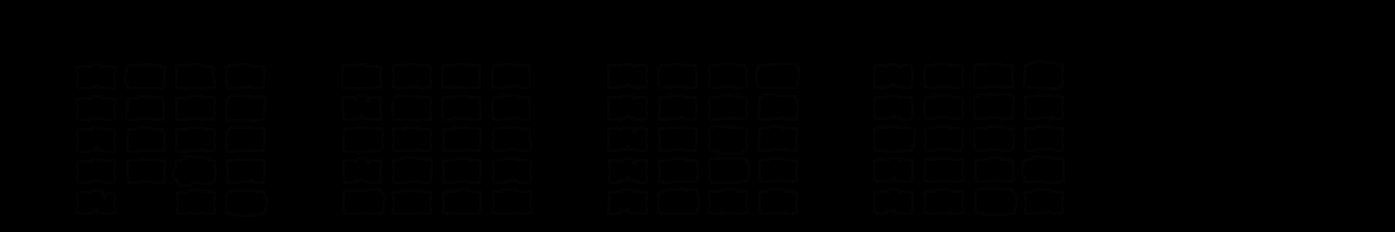

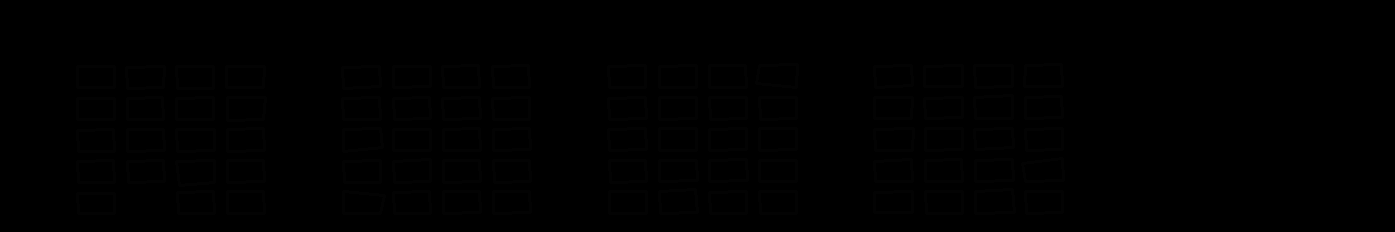

In [27]:
image = cv2.imread('/content/img1/sub_answer_card_3.jpg')# 加载图片
# cv2.imshow("Original", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# 转灰度
showImg(gray)

# OTSU二值化（黑底白字）
thresh_option_answer = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
showImg(thresh_option_answer)


kernel = np.ones((3, 3), np.uint8)
dilate_choice_answer = cv2.erode(thresh_option_answer, kernel, iterations=1)
showImg(dilate_choice_answer)


# 2、针对黑底白字的高亮部分膨胀
# 因为候选区域由三部分组成（左括号、右括号、大写的英文字母），通过膨胀将三个区域连成一片
kernel = np.ones((9, 9), np.uint8)
dilate_choice_answer = cv2.dilate(thresh_option_answer, kernel, iterations=1)
showImg(dilate_choice_answer)


# 3、提取膨胀后的轮廓
dilate_option_cnts, _ = cv2.findContours(dilate_choice_answer.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, dilate_option_cnts, -1, (3,240,240), 2)
showImg(black_background)

# # 4、筛选轮廓中的选择题候选项
choiceAnswerCnts = [] # 初始化选择题候选区域
choiceAnswerCnts1 = [] # 初始化选择题候选区域
for c in dilate_option_cnts:

    peri = cv2.arcLength(c, True)
    area = cv2.contourArea(c)
    approx = cv2.approxPolyDP(c, 0.1 * peri, True)
    # 计算轮廓的边界框
    (x, y, w, h) = cv2.boundingRect(approx)
    # 计算宽高比
    ar = w / float(h)

    # 筛选轮廓为四边形的目前轮廓
#     if len(approx) == 4850
    if y >= 60 and w >= 20 and w <= 60 and ar >= 1 and ar <= 2 and area > 700:
#     if  w >= 35 and w <= 60  and ar >= 1.2 and ar <= 2:
#             print('坐标: ', (x, y, w, h))
#         print(area)
        choiceAnswerCnts.append(c)
        choiceAnswerCnts1.append(approx)

# 5、绘制筛选出来的候选项
# print(warped_option_answer.shape)
# print(choiceAnswerCnts[0].shape)
black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, choiceAnswerCnts, -1, (3,240,240), 2)
showImg(black_background)

black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, choiceAnswerCnts1, -1, (3,240,240), 2)
showImg(black_background)


# 候选框、答案、题序最新识别方案

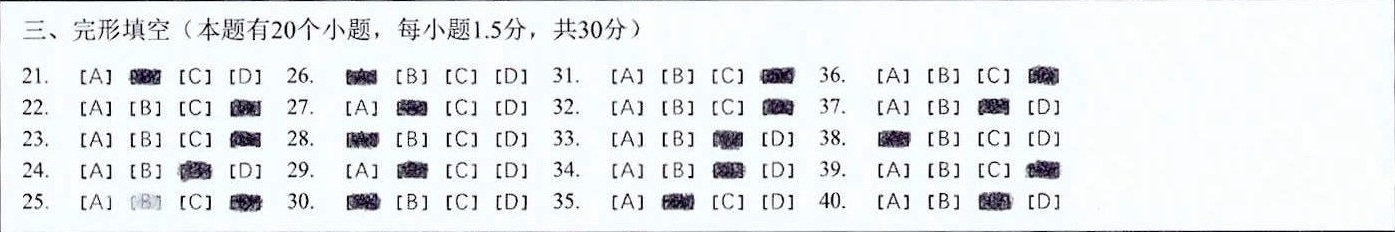

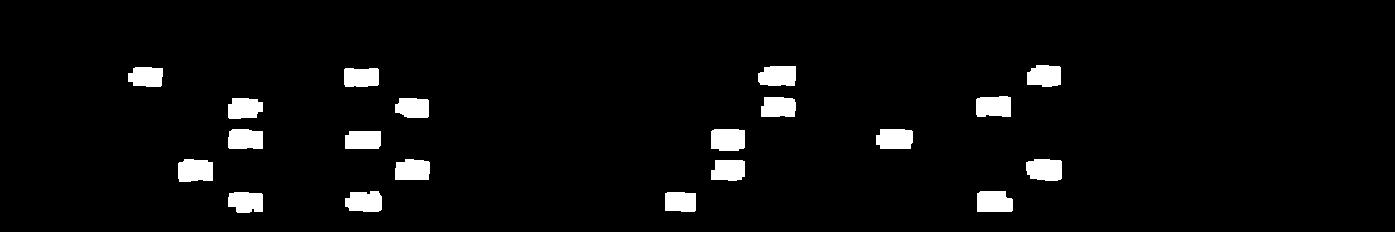

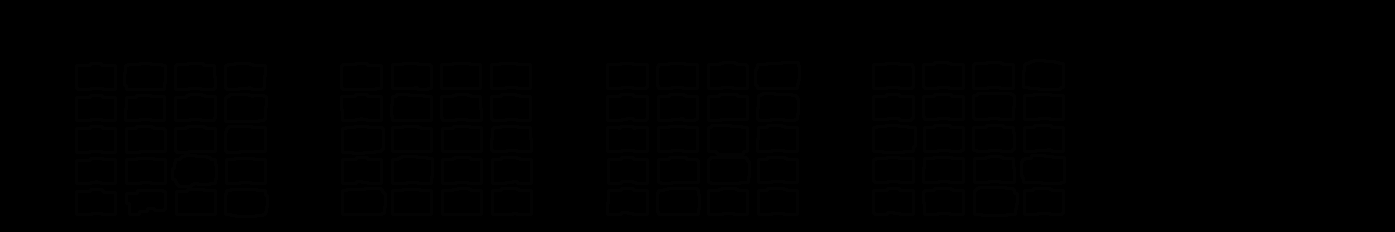

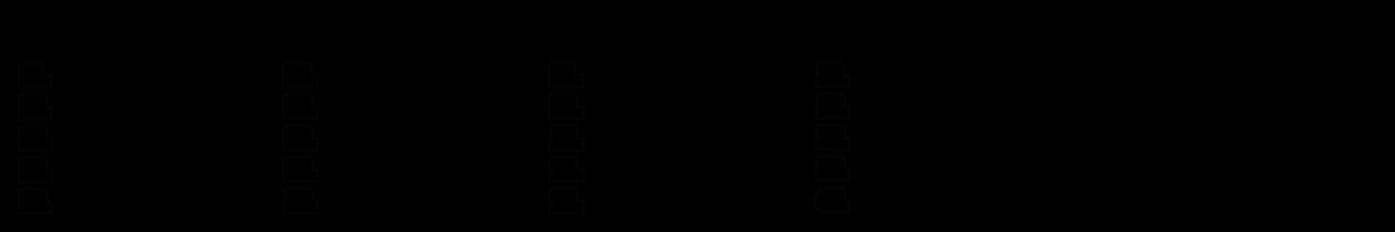

20
{'text': '35..', 'score': 0.7984870672225952}
{'text': '30.', 'score': 0.5765792727470398}
{'text': '25.', 'score': 0.5211719274520874}
{'text': '40.', 'score': 0.7822911143302917}
{'text': '24.', 'score': 0.5500749349594116}
{'text': '39', 'score': 0.5123430490493774}
{'text': '34.', 'score': 0.5044423937797546}
{'text': '29.', 'score': 0.48919862508773804}
{'text': '23.', 'score': 0.7036945819854736}
{'text': '38.', 'score': 0.6069444417953491}
{'text': '33.', 'score': 0.9243550300598145}
{'text': '28.', 'score': 0.6300896406173706}
{'text': '32.', 'score': 0.7066622972488403}
{'text': '27.', 'score': 0.6446819305419922}
{'text': '22.', 'score': 0.722072958946228}
{'text': '37.', 'score': 0.5224655866622925}
{'text': '21.', 'score': 0.823510468006134}
{'text': '36.', 'score': 0.8821739554405212}
{'text': '31.', 'score': 0.6417602300643921}
{'text': '26.', 'score': 0.5816773176193237}


In [26]:
img = cv2.imread('/content/img1/sub_answer_card_3.jpg')
showImg(img)
# 转灰度
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# OTSU二值化（黑底白字）
thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# 腐蚀
kernel = np.ones((5, 5), np.uint8)
erode_img = cv2.erode(thresh_img, kernel, iterations=1)
# 膨胀
kernel = np.ones((9, 9), np.uint8)
dilate_img = cv2.dilate(erode_img, kernel, iterations=1)
showImg(dilate_img)
# 显示图片
# showImg(dilate_choice_answer)

# 寻找轮廓
answer_cnts, _ = cv2.findContours(dilate_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, answer_cnts, -1, (3,240,240), 2)
# showImg(black_background)

# 获取检测到的所有答案框的中点的x轴坐标
answer_option_center_x = []
for cnt in answer_cnts:
    (x, y, w, h) = cv2.boundingRect(cnt)
    answer_option_center_x.append((2*x+w)/2)
#     print((x, y, w, h))
# print(answer_option_center_x)

# 获取检测到的所有选项框的中点的x轴坐标
choice_option_center_x = []
ocr_reslut = pytesseract.image_to_data(img, output_type=Output.DICT, lang='chi_sim')
# print(ocr_reslut['text'])
for i in range(len(ocr_reslut['text'])):
    text_i = ocr_reslut['text'][i]
    (x, y, w, h) = (ocr_reslut['left'][i], ocr_reslut['top'][i], ocr_reslut['width'][i], ocr_reslut['height'][i])
    if y > 60 and ('A' in text_i or 'B' in text_i or 'C' in text_i or 'D' in text_i):
        choice_option_center_x.append((2*x+w)/2)
#         print((x, y, w, h))

# print(len(choice_option_center_x))
all_option_center_x = answer_option_center_x + choice_option_center_x

# OTSU二值化（黑底白字）
thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# 膨胀
kernel = np.ones((11, 11), np.uint8)
dilate_img = cv2.dilate(thresh_img, kernel, iterations=1)
# showImg(dilate_img)

# 寻找轮廓
option_cnts, _ = cv2.findContours(dilate_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, option_cnts, -1, (3,240,240), 2)
# showImg(black_background)


def is_choice_option(x, w, all_option_center_x):
    for center_x in all_option_center_x:
        if center_x > x and center_x < x + w:
            return True
    return False

# # 4、筛选轮廓中的选择题候选项
choiceAnswerCnts = [] # 初始化选择题候选区域
questionNumberCnts = []
for c in option_cnts:
    peri = cv2.arcLength(c, True)
    area = cv2.contourArea(c)
    approx = cv2.approxPolyDP(c, 0.1 * peri, True)
    (x, y, w, h) = cv2.boundingRect(approx)
    ar = h / float(w)

    # 筛选轮廓为四边形的目前轮廓
#     if y >= 60 and w >= 20 and w <= 60 and ar >= 1 and ar <= 2 and area > 700:
    if y >= 60 and ar > 0.5 and ar < 2:
        if is_choice_option(x, w, all_option_center_x) and area > 400:
            choiceAnswerCnts.append(c)
        elif not is_choice_option(x, w, all_option_center_x) and area > 100:
#             print('area', area)
            questionNumberCnts.append(c)

black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, choiceAnswerCnts, -1, (3,240,240), 2)
showImg(black_background)

black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, questionNumberCnts, -1, (3,240,240), 2)
showImg(black_background)

print(len(questionNumberCnts))
for question_number_cnt in questionNumberCnts:
    peri = cv2.arcLength(question_number_cnt, True)
    approx = cv2.approxPolyDP(question_number_cnt, 0.1 * peri, True)
    # 计算轮廓的边界框
    (x, y, w, h) = cv2.boundingRect(approx)
    res = ocr.ocr_for_single_line(gray[y:y + h, x:x + w])
    print(res)

In [ ]:
!sudo apt update
!sudo apt install tesseract-ocr-chi-sim

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,742 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,246 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,021 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease 

# colab内部showimg

In [24]:
from google.colab.patches import cv2_imshow
def showImg(img):
    cv2_imshow(img)

# prompt: 帮我做一个选择题填涂卡的识别批改功能


In [ ]:
# prompt: 帮我做一个选择题填涂卡的识别批改功能。

# ### 3、提取并识别选项与题号

# 对选择题候选区域轮廓按y坐标从上到下进行排序，再按x坐标从左到右排序
choiceAnswerCnts = sorted(choiceAnswerCnts, key=lambda c: (cv2.boundingRect(c)[1], cv2.boundingRect(c)[0]))

# 遍历所有的选择题选项轮廓
questions = {} # 存储每个题目及其选项的轮廓
for i, c in enumerate(choiceAnswerCnts):
    # 获取当前选项轮廓的边界框
    (x, y, w, h) = cv2.boundingRect(c)

    # 获取当前选项区域图片
    choice_img = gray[y:y + h, x:x + w]

    # 对选项区域进行二值化（白底黑字），用于识别字母
    ret, binary_choice = cv2.threshold(choice_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 使用CnOcr识别选项字母（A, B, C, D）
    res = ocr.ocr_for_single_line(binary_choice)
    choice_text = ''
    # More robust check before accessing res[0]['text']
    if isinstance(res, list) and len(res) > 0 and isinstance(res[0], dict) and 'text' in res[0]:
        choice_text = res[0]['text'].strip()

    # 根据选项的y坐标和x坐标，将选项轮廓分配到对应的题目下
    # 这里假设同一行的选项属于同一道题
    question_index = -1
    for q_idx in questions:
        # 获取该题目下已有的选项轮廓的y坐标范围
        min_y = min([cv2.boundingRect(cnt)[1] for cnt in questions[q_idx]])
        max_y = max([cv2.boundingRect(cnt)[1] + cv2.boundingRect(cnt)[3] for cnt in questions[q_idx]])
        # 如果当前选项的y坐标在某个题目的y坐标范围内，则认为是同一道题
        if y >= min_y and y <= max_y:
            question_index = q_idx
            break

    # 如果没有找到对应的题目，则创建一个新题目
    if question_index == -1:
        # 尝试识别当前选项所在行的题号
        question_number = -1
        # 找到与当前选项y坐标接近的题号轮廓
        closest_qn_cnt = None
        min_y_diff = float('inf')
        for qn_cnt in questionNumberCnts:
            (qn_x, qn_y, qn_w, qn_h) = cv2.boundingRect(qn_cnt)
            y_diff = abs(y - qn_y)
            if y_diff < min_y_diff and y_diff < h: # 限制y差小于选项高度
                min_y_diff = y_diff
                closest_qn_cnt = qn_cnt

        if closest_qn_cnt is not None:
            (qn_x, qn_y, qn_w, qn_h) = cv2.boundingRect(closest_qn_cnt)
            # 裁剪题号区域图片
            qn_img = gray[qn_y:qn_y + qn_h, qn_x:qn_x + qn_w]
            # 识别题号
            qn_res = ocr.ocr_for_single_line(qn_img)
            # Check if qn_res is not empty before accessing qn_res[0]
            if isinstance(qn_res, list) and len(qn_res) > 0 and isinstance(qn_res[0], dict) and 'text' in qn_res[0]:
                try:
                    question_number_str = ''.join(filter(str.isdigit, qn_res[0]['text']))
                    if question_number_str:
                         question_number = int(question_number_str)
                    else:
                        question_number = i + 1 # 如果识别不到题号，使用顺序号
                except ValueError:
                    question_number = i + 1 # 如果识别不到题号，使用顺序号
            else:
                question_number = i + 1 # 如果识别不到题号，使用顺序号
        else:
             question_number = i + 1 # 如果没有找到题号轮廓，使用顺序号

        # 确保题号唯一性，如果已存在则顺延
        while question_number in questions:
            question_number += 1

        question_index = question_number
        questions[question_index] = []

    # 将当前选项轮廓和识别结果添加到对应的题目下
    questions[question_index].append({'cnt': c, 'text': choice_text})

# ### 4、识别每个选项区域的填充情况并进行批改

# 设置标准答案，例如: {题号: '正确选项字母'}
# TODO: 需要从外部加载或指定正确答案
ANSWER_KEY = {
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'A',
    5: 'A',
    6: 'B',
    7: 'C',
    8: 'D',
    9: 'A',
    10: 'B',
    # 添加更多题目的正确答案
}

# 用于存储批改结果
results = {}

# 遍历每个题目
for question_number, options_data in sorted(questions.items()):
    # 对同一题目的选项按x坐标排序 (A, B, C, D)
    options_data = sorted(options_data, key=lambda item: cv2.boundingRect(item['cnt'])[0])

    # 初始化当前题目的识别到的选项和填充情况
    recognized_options = [item['text'] for item in options_data]
    filled_option = None
    filled_count = 0 # 记录填充了多少个选项

    # 遍历当前题目的每个选项
    for option_data in options_data:
        cnt = option_data['cnt']
        text = option_data['text']

        # 获取选项区域的边界框
        (x, y, w, h) = cv2.boundingRect(cnt)
        option_img = thresh_option_answer[y:y + h, x:x + w] # 使用黑底白字的二值图

        # 计算选项区域内非零像素的比例 (填充情况)
        total_pixels = w * h
        filled_pixels = cv2.countNonZero(option_img)
        filled_percentage = filled_pixels / total_pixels

        # 根据填充比例判断是否被填充
        # 这里的阈值需要根据实际情况调整
        if filled_percentage > 0.3: # 假设填充比例大于30%认为是填充了
            filled_count += 1
            filled_option = text # 记录被填充的选项字母

    # 进行批改
    correct_answer = ANSWER_KEY.get(question_number, None)
    is_correct = False
    status = "未作答" # 默认未作答

    if filled_count == 1: # 只填充了一个选项
        if filled_option is not None and filled_option == correct_answer:
            is_correct = True
            status = "正确"
        else:
            status = "错误"
    elif filled_count > 1: # 填充了多个选项
        status = "多选"
    # 如果filled_count == 0，则status保持"未作答"

    results[question_number] = {
        'recognized_options': recognized_options,
        'filled_option': filled_option if filled_count == 1 else (', '.join([item['text'] for item in options_data if cv2.countNonZero(thresh_option_answer[cv2.boundingRect(item['cnt'])[1]:cv2.boundingRect(item['cnt'])[1] + cv2.boundingRect(item['cnt'])[3], cv2.boundingRect(item['cnt'])[0]:cv2.boundingRect(item['cnt'])[0] + cv2.boundingRect(item['cnt'])[2]]) / (cv2.boundingRect(item['cnt'])[2] * cv2.boundingRect(item['cnt'])[3]) > 0.3]) if filled_count > 1 else None),
        'filled_count': filled_count,
        'correct_answer': correct_answer,
        'is_correct': is_correct,
        'status': status
    }

# ### 5、可视化批改结果

output_image = image.copy() # 在原始图片上绘制结果

# 遍历批改结果，绘制标记
for question_number, result in sorted(results.items()):
    status = result['status']
    # 找到对应题号的选项轮廓
    if question_number in questions:
        options_data = questions[question_number]
        # 找到所有选项的边界框，计算一个整体的区域来标记题号和状态
        if options_data:
            all_x = [cv2.boundingRect(item['cnt'])[0] for item in options_data]
            all_y = [cv2.boundingRect(item['cnt'])[1] for item in options_data]
            all_w = [cv2.boundingRect(item['cnt'])[2] for item in options_data]
            all_h = [cv2.boundingRect(item['cnt'])[3] for item in options_data]

            min_x = min(all_x)
            min_y = min(all_y)
            max_x_w = max([x + w for x, w in zip(all_x, all_w)])
            max_y_h = max([y + h for y, h in zip(all_y, all_h)])

            # 定义标记颜色和文本
            color = (0, 0, 255) # 默认红色 (错误/未作答/多选)
            mark_text = f"{question_number}. {status}"

            if status == "正确":
                color = (0, 255, 0) # 绿色

            # 绘制题号和状态文本
            cv2.putText(output_image, mark_text, (min_x, min_y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

            # 在正确答案的选项上绘制一个圆圈标记
            if status == "正确" and result['filled_option'] is not None:
                 for option_data in options_data:
                    if option_data['text'] == result['filled_option']:
                         (x, y, w, h) = cv2.boundingRect(option_data['cnt'])
                         center_x = x + w // 2
                         center_y = y + h // 2
                         radius = min(w, h) // 2 + 5
                         cv2.circle(output_image, (center_x, center_y), radius, color, 2)

            # 如果是错误、多选或未作答，并且有正确答案，标记正确答案
            if status != "正确" and result['correct_answer'] is not None:
                 correct_option_text = result['correct_answer']
                 for option_data in options_data:
                    if option_data['text'] == correct_option_text:
                         (x, y, w, h) = cv2.boundingRect(option_data['cnt'])
                         center_x = x + w // 2
                         center_y = y + h // 2
                         radius = min(w, h) // 2 + 5
                         cv2.circle(output_image, (center_x, center_y), radius, (255, 0, 0), 2) # 蓝色标记正确答案

# 显示批改结果图片
showImg(output_image)

# 打印批改结果摘要
print("\n--- 批改结果摘要 ---")
correct_count = 0
total_questions = len(results)
for question_number, result in sorted(results.items()):
    print(f"题号: {question_number}, 识别选项: {', '.join(result['recognized_options'])}, 填充: {result['filled_option']}, 填充数: {result['filled_count']}, 正确答案: {result['correct_answer']}, 状态: {result['status']}")
    if result['is_correct']:
        correct_count += 1

print(f"\n总题数: {total_questions}, 正确题数: {correct_count}")

error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'boundingRect'
> Overload resolution failed:
>  - array is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'array'


# 选择题 批改代码分析

## 常量

In [59]:
# coding=utf-8

# 图片中的答题卡框数量. 比如一张图片可以划分为左右2个答题卡框
ANSWER_CARD_SIZE = 2

# 答题卡框的最小宽度
ANSWER_CARD_MIN_WIDTH = 1200

# 大标题序号
TITLE_NUM = ['一', '二', '三', '四', '五', '六', '七', '八', '九', '十', '十一', '十二', '十三', '十四', '十五', '十六', '十七']

# 识别左上角大标题序号, 识别范围的宽
TITLE_TOP_LEFT_CORNER_WIDTH = 50

# 识别左上角大标题序号, 识别范围的高
TITLE_TOP_LEFT_CORNER_HEIGTH = 65
file_path_root="/content/img3"
import os
os.makedirs(file_path_root, exist_ok=True)

## 工具包

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from imutils import auto_canny


def order_points(pts):
    """4边形4点排序函数

    Args:
        pts ([type]): 4边形任意顺序的4个顶点

    Returns:
        [type]: 按照一定顺序的4个顶点
    """

    rect = np.zeros((4, 2), dtype="float32")  # 按照左上、右上、右下、左下顺序初始化坐标

    s = pts.sum(axis=1)  # 计算点xy的和
    rect[0] = pts[np.argmin(s)]  # 左上角的点的和最小
    rect[2] = pts[np.argmax(s)]  # 右下角的点的和最大

    diff = np.diff(pts, axis=1)  # 计算点xy之间的差
    rect[1] = pts[np.argmin(diff)]  # 右上角的差最小
    rect[3] = pts[np.argmax(diff)]  # 左下角的差最小
    return rect  # 返回4个顶点的顺序


def four_point_transform(image, pts):
    """4点变换

    Args:
        image ([type]): 原始图像
        pts ([type]): 4个顶点

    Returns:
        [type]: 变换后的图像
    """

    rect = order_points(pts)  # 获得一致的顺序的点并分别解包他们
    (tl, tr, br, bl) = rect

    # 计算新图像的宽度(x)
    widthA = np.sqrt(((br[0] - bl[0])**2) + ((br[1] - bl[1])**2))  # 右下和左下之间距离
    widthB = np.sqrt(((tr[0] - tl[0])**2) + ((tr[1] - tl[1])**2))  # 右上和左上之间距离
    maxWidth = max(int(widthA), int(widthB))  # 取大者

    # 计算新图像的高度(y)
    heightA = np.sqrt(((tr[0] - br[0])**2) + ((tr[1] - br[1])**2))  # 右上和右下之间距离
    heightB = np.sqrt(((tl[0] - bl[0])**2) + ((tl[1] - bl[1])**2))  # 左上和左下之间距离
    maxHeight = max(int(heightA), int(heightB))

    # 有了新图像的尺寸, 构造透视变换后的顶点集合
    dst = np.array(
        [
            [0, 0],  # -------------------------左上
            [maxWidth - 1, 0],  # --------------右上
            [maxWidth - 1, maxHeight - 1],  # --右下
            [0, maxHeight - 1]
        ],  # ------------左下
        dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)  # 计算透视变换矩阵
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))  # 执行透视变换

    return warped  # 返回透视变换后的图像


def sort_contours(cnts, method="left-to-right"):
    """轮廓排序

    Args:
        cnts ([type]): 轮廓
        method (str, optional): 排序方式. Defaults to "left-to-right".

    Returns:
        [type]: 排序好的轮廓
    """

    if cnts is None or len(cnts) == 0:
        return [], []

    # 初始化逆序标志和排序索引
    reverse = False
    i = 0

    # 是否需逆序处理
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # 是否需要按照y坐标函数
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # 构造包围框列表，并从上到下对它们进行排序
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(
        zip(cnts, boundingBoxes), key=lambda b: b[1][i], reverse=reverse))

    # 返回已排序的轮廓线和边框列表
    return cnts, boundingBoxes


def get_init_process_img(img_path):
    """
    对图片进行初始化处理，包括灰度，高斯模糊，腐蚀，膨胀和边缘检测等
    :param roi_img: ndarray
    :return: ndarray
    """
    image = cv2.imread(img_path)
    # 转灰度
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 高斯模糊
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # 腐蚀erode与膨胀dilate
    # kernel = np.ones((3, 3), np.uint8)
    # blurred = cv2.erode(blurred, kernel, iterations=1) # 腐蚀
    # blurred = cv2.dilate(blurred, kernel, iterations=2) # 膨胀
    # blurred = cv2.erode(blurred, kernel, iterations=1) # 腐蚀
    # blurred = cv2.dilate(blurred, kernel, iterations=2) # 膨胀

    # 边缘检测
    # edged = cv2.Canny(blurred, 75, 200)
    edged = auto_canny(blurred)
    return edged


def capture_img(origin_image_path, target_image_path, contour):
    """根据轮廓截取图片

    Args:
        origin_image_path ([type]): 原始图片路径
        target_image_path ([type]): 目标图片路径
        contour ([type]): 截取轮廓

    Returns:
        [type]: [description]
    """
    # 根据轮廓或者坐标
    x, y, w, h = cv2.boundingRect(contour)
    # 截图
    image = cv2.imread(origin_image_path)
    cv2.imwrite(target_image_path, image[y:y + h, x:x + w])


def save_img_by_cnts(save_image_path, image_size, cnts):
    """通过提取的轮廓绘制图片并保存

    Args:
        save_image_path ([type]): 图片存储路径
        image ([type]): 绘制的图片尺寸, 长与宽
        cnts ([type]): 轮廓列表
    """
    black_background = np.ones(image_size, np.uint8) * 0
    cv2.drawContours(black_background, cnts, -1, (255, 255, 255), 2)
    plt.figure(figsize=(10, 5))
    plt.imshow(black_background)
    plt.axis('off')
    plt.savefig(save_image_path)


def ocr_single_line_img(image_path, ocr):
    """ocr识别图片

    Args:
        origin_image_path ([type]): 原始图片路径
        ocr ([type]): ocr

    Returns:
        [type]: [description]
    """

    image = cv2.imread(image_path)
    res = ocr.ocr_for_single_line(image[0:TITLE_TOP_LEFT_CORNER_WIDTH, 0:TITLE_TOP_LEFT_CORNER_HEIGTH])
    if len(res) > 0 and res[0] == '-':
        res[0] = '一'
    return res

## 选择题处理方法

In [6]:
'''
Author: wangxin
Date: 2021-05-25 10:31:01
LastEditTime: 2021-07-01 14:11:58
LastEditors: Please set LastEditors
Description: 选择题自动识别与批改
'''

# coding=utf-8
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
file_path_root="/content"


def detection_choice_question(images_path, ocr):
    """ 选择题自动识别与批改

    Args:
        images_path (list): 图片地址列表
    Returns:
        [list]: 每张图片的识别结果
    """

    sub_answer_cnt_szie = 0
    question_answers = []
    for img_path in images_path:
        image = cv2.imread(img_path)
        if not is_choice_question(image):
            continue

        # 获取图片中填充的全部答案轮廓
        answer_option_cnts = get_answer_option_cnts(image)
        if len(answer_option_cnts) > 0:
            save_img_by_cnts(file_path_root+'/answer_cnt_' + str(sub_answer_cnt_szie) + '.png', image.shape[:2], answer_option_cnts)

        # 所有被填充的选择项的中心的x坐标
        answer_options_center_x = get_cnt_center_x(answer_option_cnts)
        # 所有未被填充的选择项的中心的x坐标
        choice_options_center_x = get_choice_option_center_x(img_path)
        # 所有选择项的中心的x坐标
        all_options_center_x = answer_options_center_x + choice_options_center_x

        # 获取所有选择项的轮廓及其题序轮廓
        all_choice_option_cnts, question_number_cnts = get_choice_option_cnts(image, all_options_center_x)
        if len(all_choice_option_cnts) > 0:
            save_img_by_cnts(file_path_root + '/choice_cnt_' + str(sub_answer_cnt_szie) + '.png', image.shape[:2], all_choice_option_cnts)
            save_img_by_cnts(file_path_root + '/ques_num_' + str(sub_answer_cnt_szie) + '.png', image.shape[:2], question_number_cnts)

        sub_answer_cnt_szie = sub_answer_cnt_szie + 1

        # 选择题自动批改
        if len(all_choice_option_cnts) > 0:
            question_answer_dict = get_choice_question_answer_index(image, all_choice_option_cnts, answer_option_cnts, question_number_cnts, ocr)
            question_answers.append(question_answer_dict)
    return question_answers


def get_answer_option_cnts(img):
    """ 识别图片中的填充的全部答案轮廓

    Args:
        img_path (String): 图片

    Returns:
        [list]: 候选项轮廓
    """

    # 转灰度
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # OTSU二值化（黑底白字）
    thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # 腐蚀
    kernel = np.ones((5, 5), np.uint8)
    erode_img = cv2.erode(thresh_img, kernel, iterations=1)
    # 膨胀
    kernel = np.ones((9, 9), np.uint8)
    dilate_img = cv2.dilate(erode_img, kernel, iterations=1)

    # 提取答案的轮廓
    answer_cnts, _ = cv2.findContours(dilate_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # 减少答案轮廓的边数
    answer_option_cnts = []
    for cnt in answer_cnts:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.06 * peri, True)
        answer_option_cnts.append(approx)

    # self.assertTrue(choiceAnswerCnts % 4 == 0, "候选框提取异常, 提取的数量不是4的整数")
    return answer_option_cnts


def get_choice_option_cnts(img, all_options_center_x):
    """识别图片中的所有的选择项轮廓与题序轮廓

    Args:
        img ([type]): [description]
        all_option_center_x ([type]): [description]

    Returns:
        [type]: [description]
    """
    # 灰度
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 二值化（黑底白字）
    thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # 对高亮部分膨胀
    # 因为候选区域由三部分组成（左括号、右括号、大写的英文字母），通过膨胀将三个区域连成一片
    kernel = np.ones((11, 11), np.uint8)
    dilate_img = cv2.dilate(thresh_img, kernel, iterations=1)

    # 提取膨胀后的轮廓
    option_cnts, _ = cv2.findContours(dilate_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # 所有候选框的轮廓
    choice_option_cnts = []
    # 每道选择题的题序
    question_number_cnts = []
    for c in option_cnts:
        peri = cv2.arcLength(c, True)
        area = cv2.contourArea(c)
        approx = cv2.approxPolyDP(c, 0.1 * peri, True)
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = h / float(w)

        # 筛选轮廓为四边形的目前轮廓
        #     if y >= 60 and w >= 20 and w <= 60 and ar >= 1 and ar <= 2 and area > 700:
        if y >= 60 and ar > 0.5 and ar < 2:
            if is_choice_option(x, w, all_options_center_x) and area > 400:
                choice_option_cnts.append(c)
            elif not is_choice_option(x, w, all_options_center_x) and area > 100:
                question_number_cnts.append(c)
    return choice_option_cnts, question_number_cnts


def is_choice_option(x, w, all_option_center_x):
    for center_x in all_option_center_x:
        if center_x > x and center_x < x + w:
            return True
    return False


def get_cnt_center_x(cnts):
    """返回轮廓中心的x轴坐标

    Args:
        cnts (list): 轮廓列表

    Returns:
        [list]: 中心x轴坐标
    """
    center_x = []
    for cnt in cnts:
        (x, y, w, h) = cv2.boundingRect(cnt)
        center_x.append((2 * x + w) / 2)
    return center_x


def get_choice_option_center_x(img):
    """ 识别所有未被填充的选择项的中心的x坐标

    Args:
        img ([type]): [description]

    Returns:
        [type]: [description]
    """
    img = cv2.imread(img)
    ocr_reslut = pytesseract.image_to_data(img, output_type=Output.DICT, lang='chi_sim')

    choice_option_center_x = []
    for i in range(len(ocr_reslut['text'])):
        text_i = ocr_reslut['text'][i]
        (x, y, w, _) = (ocr_reslut['left'][i], ocr_reslut['top'][i], ocr_reslut['width'][i], ocr_reslut['height'][i])
        if y > 60 and ('A' in text_i or 'B' in text_i or 'C' in text_i or 'D' in text_i):
            choice_option_center_x.append((2 * x + w) / 2)
    return choice_option_center_x


def get_answer_card_cnts(img):
    """ 获得答题卡的左右答题区域
    # findContours 函数详解：https://blog.csdn.net/laobai1015/article/details/76400725
    # approxPolyDP 多边形近似 https://blog.csdn.net/kakiebu/article/details/79824856

    Args:
        img ([type]): 图片
    Returns:
        [type]: 答题卡的左右答题区域轮廓
    """

    # 检测图片中的最外围轮廓
    cnts, _ = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)
    # print("原始图片检测的轮廓总数：", len(cnts))
    if len(cnts) == 0:
        return None

    # 提取的轮廓总数
    contour_size = 0
    # 检测到的左右答题区域轮廓
    answer_cnts = []

    # 将轮廓按大小, 降序排序
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    for c in cnts:
        # arcLength 计算周长
        peri = cv2.arcLength(c, True)
        # print("轮廓周长：", peri)

        # 之前寻找到的轮廓可能是多边形，现在通过寻找近似轮廓，得到期望的四边形
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # print('原始轮廓的边数:', len(c), ', 近似轮廓的边数:', len(approx))

        # 当近似轮廓为4时，代表是需要提取的矩形区域
        if len(approx) == 4:
            contour_size = contour_size + 1
            answer_cnts.append(approx)

        # 只提取答题卡中的最大两个轮廓
        if contour_size == ANSWER_CARD_SIZE:
            break

    answer_cnts = sort_contours(answer_cnts, method="left-to-right")[0]
    return answer_cnts


def get_sub_answer_card_cnts(img_path):
    """ 获得答题卡的子区域
    # findContours 函数详解：https://blog.csdn.net/laobai1015/article/details/76400725
    # approxPolyDP 多边形近似 https://blog.csdn.net/kakiebu/article/details/79824856

    Args:
        img ([type]): 图片
    Returns:
        [type]: 答题卡的左右答题区域轮廓
    """
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # warped_answer_image_1 = four_point_transform(gray, answer_contour_1.reshape(4, 2))

    # 二值化
    thresh = cv2.threshold(gray, 0, 255,
                           cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    # 在二值图像中查找轮廓，包括内围、外围轮廓，但是检测到的轮廓不建立等级关系，彼此之间独立
    thresh_cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_LIST,
                                      cv2.CHAIN_APPROX_SIMPLE)

    cnt_size = 0
    sub_answer_cnts = []
    if len(thresh_cnts) > 0:
        # 将轮廓按大小, 降序排序
        thresh_cnts = sorted(thresh_cnts, key=cv2.contourArea, reverse=True)
        for c in thresh_cnts:
            cnt_size = cnt_size + 1

            # arcLength 计算周长
            peri = cv2.arcLength(c, True)

            # 计算轮廓的边界框
            (x, y, w, h) = cv2.boundingRect(c)

            # 之前寻找到的轮廓可能是多边形，现在通过寻找近似轮廓，得到期望的四边形
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)

            # 只提取近似轮廓为四边形的区域, 且轮廓长度大于指定长度
            # if len(approx) == 4 and w > ANSWER_CARD_MIN_WIDTH:

            # print("轮廓周长：", peri, '宽:', w)
            # print('原始轮廓的边数:', len(c), ', 近似轮廓的边数:', len(approx))
            if w > ANSWER_CARD_MIN_WIDTH:
                sub_answer_cnts.append(approx)

            # 只处理前20个最大轮廓
            if cnt_size >= 20:
                break

    # 从上到下，将轮廓排序
    sub_answer_cnts = sort_contours(sub_answer_cnts, method="top-to-bottom")[0]
    return sub_answer_cnts


def get_question_num_dict(image, question_number_cnts, ocr):
    """获取图片中所有的选择题的题序

    Args:
        image ([type]): 图片
        question_number_cnts ([type]): 图片中的所有的选择题的题序轮廓
        ocr ([type]): ocr识别工具

    Returns:
        [dict]: key: 题序, value: 题序轮廓的坐标
    """
    question_num_dict = {}
    for question_number_cnt in question_number_cnts:
        peri = cv2.arcLength(question_number_cnt, True)
        approx = cv2.approxPolyDP(question_number_cnt, 0.1 * peri, True)
        (x, y, w, h) = cv2.boundingRect(approx)

        # ocr识别题型轮廓区域的文本
        text = ocr.ocr_for_single_line(image[y:y + h, x:x + w])
        question_num = ''.join(text)
        question_num = question_num.replace('.', '')

        # 文本是否为数字
        if question_num.isdigit():
            (x, y, w, h) = cv2.boundingRect(question_number_cnt)
            question_num_dict[int(question_num)] = (x, y, w, h)

    # 按照题序从小到大排序
    question_num_list = sorted(question_num_dict.items(), key=lambda item: item[0])
    return dict(question_num_list)


def get_choice_question_answer_index(image, choice_option_cnts, answer_option_cnts, question_number_cnts, ocr):
    """自动批改, 返回每道试题对应的答案索引. \
       注意：(1)用户可能没有填充答案 (2)选择题的答案数量可能大于1

    Args:
        choice_option_cnts (list): 试题的选择项轮廓
        answer_option_cnts (list): 用户填充的答案轮廓
        question_number_cnts (list): 试题的题序轮廓
    Returns:
        [dict]: key  题序, value 答案索引列表
    """

    # 获取所有选择题的题序
    question_num_dict = get_question_num_dict(image, question_number_cnts, ocr)

    question_answer_dict = {}
    for key in question_num_dict.keys():
        (num_x, num_y, num_w, num_h) = question_num_dict[key]
        num_center_x = (2 * num_x + num_w) / 2
        num_center_y = (2 * num_y + num_h) / 2

        # 获取同一行中，本题序右侧第一个题序的中心x坐标
        min_num_center_x = float("inf")  # 无穷大
        for question_number_cnt in question_number_cnts:
            (x, y, w, h) = cv2.boundingRect(question_number_cnt)
            right_num_center_x = (2 * x + w) / 2
            if num_center_y > y and num_center_y < y + h and right_num_center_x > num_center_x and right_num_center_x < min_num_center_x:
                min_num_center_x = right_num_center_x
        # print(min_num_center_x)

        # 获取本题的全部答案轮廓的中心x坐标列表
        # 一道选择题题可能有多个答案， 所以answers_center_x为列表
        answers_center_x = []
        for answer_option_cnt in answer_option_cnts:
            (x, y, w, h) = cv2.boundingRect(answer_option_cnt)
            answer_cnt_center_x = (2 * x + w) / 2
            if num_center_y > y and num_center_y < y + h and answer_cnt_center_x > num_center_x and answer_cnt_center_x < min_num_center_x:
                answers_center_x.append(answer_cnt_center_x)
        # print('answers_center_x', answers_center_x)

        # 获取本题的全部选择项轮廓
        question_choice_option_cnts = []
        for choice_option_cnt in choice_option_cnts:
            # print(len(question_choice_option_cnts))
            (x, y, w, h) = cv2.boundingRect(choice_option_cnt)
            choice_option_center_x = (2 * x + w) / 2
            if num_center_y > y and num_center_y < y + h and choice_option_center_x > num_center_x and choice_option_center_x < min_num_center_x:
                question_choice_option_cnts.append(choice_option_cnt)

        question_choice_option_cnts, _ = sort_contours(question_choice_option_cnts, 'left-to-right')
        # print('question_choice_option_cnts', len(question_choice_option_cnts))

        # 答案列表
        answer_indexes = []
        # 答案索引
        answer_index = 0
        for choice_option_cnt in question_choice_option_cnts:
            answer_index = answer_index + 1
            (x, y, w, h) = cv2.boundingRect(choice_option_cnt)
            # print((x, y, w, h), answers_center_x)
            for answer_center_x in answers_center_x:
                if answer_center_x > x and answer_center_x < x + w:
                    answer_indexes.append(answer_index)
                    break
        question_answer_dict[key] = answer_indexes

    # 返回每道试题对应的答案索引
    question_answer_dict = sorted(question_answer_dict.items(), key=lambda item: item[0])
    return dict(question_answer_dict)


def is_choice_question(img):
    """判断当前图片是否属于选择题

    Args:
        image_path ([type]): 图片

    Returns:
        [boolean]: false 不是  true 是
    """
    ocr_result = pytesseract.image_to_data(img, output_type=Output.DICT, lang='chi_sim')
    ocr_text = ocr_result['text']
    return '[A]' in ocr_text or '[B]' in ocr_text or '[C]' in ocr_text or '[D]' in ocr_text

## 考号区域 处理

In [10]:
'''
Author: wangxin
Date: 2021-05-25 10:31:01
LastEditTime: 2021-07-01 13:55:35
LastEditors: Please set LastEditors
Description: 检测考号
'''

# coding=utf-8
import cv2
import numpy as np
from PIL import Image



def get_exam_num_area(image_path):
    """ 获取图片中待检测的考号填充区域

    Args:
        image_path (String): 图片地址

    Returns:
        [type]: [description]
    """
    image = Image.open(image_path)
    image_width = image.width

    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # 先腐蚀与膨胀, 高亮化学生填充的考号
    kernel = np.ones((9, 9), np.uint8)
    erode_img = cv2.erode(threshold_img, kernel, iterations=1)
    kernel = np.ones((9, 9), np.uint8)
    dilate_img = cv2.dilate(erode_img, kernel, iterations=1)

    # 学生填充的考号，最左边边缘的x轴坐标
    exam_number_left_x = float("inf")
    # 学生填充的考号，最右边边缘的x轴坐标
    exam_number_right_x = 0
    cnts, _ = cv2.findContours(dilate_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        if x > image_width / 2:
            if x < exam_number_left_x:
                exam_number_left_x = x
            if x + w > exam_number_right_x:
                exam_number_right_x = x + w

    # 通过x轴坐标，缩小待检测区域的范围
    threshold_img = threshold_img[:, exam_number_left_x - 15:exam_number_right_x + 15]

    # 再通过检测图片中面积最大的轮廓（考号手写区域, 而不是填充区域）, 进一步缩小范围
    cnts, _ = cv2.findContours(threshold_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    mix_y = None
    num_card_cnt = None
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.06 * peri, True)
        (x, y, w, h) = cv2.boundingRect(approx)
        if len(approx) == 4:
            cv2.imwrite(file_path_root+ '/num_card.jpg', threshold_img[y:y + h, x:x + w])
            num_card_cnt = c
            mix_y = y + h
            break

    threshold_img = threshold_img[mix_y:, :]
    return threshold_img, num_card_cnt


def get_exam_num_height(img):
    """ 获取考号填充区域, 行中心与行中心的y轴坐标间隔

    Args:
        img ([type]): 图片

    Returns:
        [float]: 行中心与行中心的y轴坐标间隔
    """

    # 膨胀
    kernel = np.ones((5, 5), np.uint8)
    dilate_img = cv2.dilate(img, kernel, iterations=1)

    # 第一行待填充考号的中心的x轴坐标
    first_line_center_y = None
    # 第二行待填充考号的中心的x轴坐标
    second_line_center_y = None
    # 第一行待填充考号的底部边缘的y坐标
    first_line_bottom_y = None
    cnts, _ = cv2.findContours(dilate_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cnts, _ = sort_contours(cnts, 'top-to-bottom')
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.06 * peri, True)
        (x, y, w, h) = cv2.boundingRect(approx)
        center_y = (2 * y + h) / 2

        if h > 10:
            if first_line_center_y is None:
                first_line_center_y = center_y
                first_line_bottom_y = y + h

            if center_y > first_line_bottom_y and second_line_center_y is None:
                second_line_center_y = center_y
                break

    print(type(second_line_center_y))
    return second_line_center_y - first_line_center_y


def detection_exam_num(image_path):
    """ 识别图片中学生填充的考号

    Args:
        image_path (String): 图片地址

    Returns:
        [list]: 识别的考号结果
    """
    # 获取图片中考号填充区域范围
    thresh_img, _ = get_exam_num_area(image_path)

    # 获取考号填充区域, 每2行的中心y轴坐标间隔
    line_y_height = get_exam_num_height(thresh_img)

    # 腐蚀与膨胀
    kernel = np.ones((9, 9), np.uint8)
    erode_img = cv2.erode(thresh_img, kernel, iterations=1)
    kernel = np.ones((9, 9), np.uint8)
    dilate_img = cv2.dilate(erode_img, kernel, iterations=1)

    # 学生填充考号的识别结果
    num_card = []
    cnts, _ = cv2.findContours(dilate_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cnts, boundingBoxes = sort_contours(cnts, 'left-to-right')
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.06 * peri, True)
        (x, y, w, h) = cv2.boundingRect(approx)
        num_card.append(int(y / line_y_height))
    return num_card


# if __name__ == '__main__':
#     num_card = detection_exam_num('/content/special_num_card_1.png')
#     print('num_card: ', num_card)

## 主函数

In [16]:

from cnocr import CnOcr


def demo(origin_image_path):
    # 获取答题卡左右区域
    image = get_init_process_img(origin_image_path)
    answer_cnts = get_answer_card_cnts(image)
    answer_card_images_path = []
    if len(answer_cnts) > 0:
        len_answer_cnts = 0
        for c in answer_cnts:
            len_answer_cnts = len_answer_cnts + 1
            answer_card_image_path = file_path_root + '/answer_card_' + str(len_answer_cnts) + '.jpg'
            answer_card_images_path.append(answer_card_image_path)
            capture_img(origin_image_path, answer_card_image_path, c)
    print('答题卡左右区域切分结果：', answer_card_images_path)

    # 将答题卡切分为一道道试题
    sub_answer_card_images_path = []
    sub_answer_cnt_szie = 0
    for answer_card_image in answer_card_images_path:
        sub_answer_cnts = get_sub_answer_card_cnts(answer_card_image)
        if len(sub_answer_cnts) > 1:
            sub_answer_cnts = sub_answer_cnts[1:len(sub_answer_cnts)]

        if len(sub_answer_cnts) > 0:
            for c in sub_answer_cnts:
                sub_answer_card_image_path = file_path_root +'/sub_answer_card_' + str(sub_answer_cnt_szie) + '.jpg'
                sub_answer_card_images_path.append(sub_answer_card_image_path)
                capture_img(answer_card_image, sub_answer_card_image_path, c)
                sub_answer_cnt_szie = sub_answer_cnt_szie + 1
    print('试题切分结果：', sub_answer_card_images_path)

    # 获取每个大标题的索引
    ocr = CnOcr()
    title_index = []
    for img in sub_answer_card_images_path:
        res = ocr_single_line_img(img, ocr)
        if len(res) > 0 and res[0] in TITLE_NUM:
            title_index.append(sub_answer_card_images_path.index(img))
    print('每道大题的起始图片索引: ', title_index)

    # 学生考号自动识别
    num_card = detection_exam_num(sub_answer_card_images_path[0])
    print('学生考号: ', num_card)

    # 选择题自动识别与批改
    question_answer_dict = detection_choice_question(sub_answer_card_images_path, ocr)
    print('每道选择题答案（key 题序, value: 对应题序的答案列表）：', question_answer_dict)


if __name__ == '__main__':
    demo('/content/answer_card.jpg')

答题卡左右区域切分结果： ['/content/answer_card_1.jpg', '/content/answer_card_2.jpg']


试题切分结果： ['/content/sub_answer_card_0.jpg', '/content/sub_answer_card_1.jpg', '/content/sub_answer_card_2.jpg', '/content/sub_answer_card_3.jpg', '/content/sub_answer_card_4.jpg', '/content/sub_answer_card_5.jpg', '/content/sub_answer_card_6.jpg', '/content/sub_answer_card_7.jpg', '/content/sub_answer_card_8.jpg', '/content/sub_answer_card_9.jpg', '/content/sub_answer_card_10.jpg']


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



densenet_lite_136-gru-onnx.zip:   0%|          | 0.00/11.6M [00:00<?, ?B/s]

KeyError: 0

In [4]:
!pip install pytesseract

In [12]:
!pip install cnocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.6/224.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.4/253.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## 手动分析 主函数

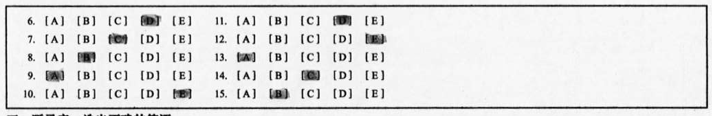

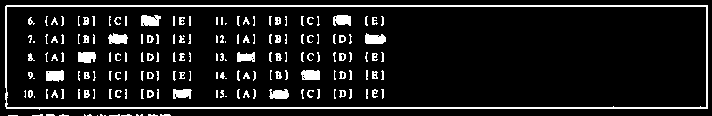

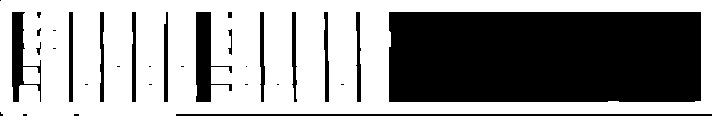

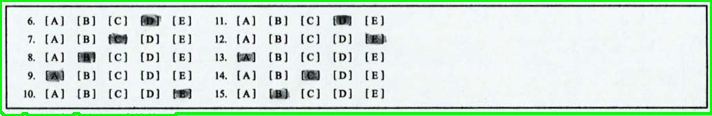

每道选择题答案（key 题序, value: 对应题序的答案列表）： []


In [64]:
ocr = CnOcr()
# 选择题自动识别与批改
sub_answer_card_images_path = ["/content/英语-选择题-学生答题卡.jpg"]
question_answer_dict = detection_choice_question(sub_answer_card_images_path, ocr)
print('每道选择题答案（key 题序, value: 对应题序的答案列表）：', question_answer_dict)

In [57]:
ocr = CnOcr()
# 选择题自动识别与批改
sub_answer_card_images_path = ["/content/img1/sub_answer_card_1.jpg","/content/img1/sub_answer_card_2.jpg"]
question_answer_dict = detection_choice_question(sub_answer_card_images_path, ocr)
print('每道选择题答案（key 题序, value: 对应题序的答案列表）：', question_answer_dict)

裁剪区域 (19, 190, 23, 25) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
5
裁剪区域 (551, 189, 33, 25) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
15
裁剪区域 (285, 189, 33, 25) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
10
裁剪区域 (551, 158, 33, 25) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
14
裁剪区域 (285, 158, 22, 25) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
9
裁剪区域 (18, 158, 24, 25) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
4
裁剪区域 (19, 127, 23, 25) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
3
裁剪区域 (551, 126, 32, 25) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
13
裁剪区域 (284, 126, 22, 26) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
8
裁剪区域 (284, 95, 23, 25) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
7
裁剪区域 (18, 95, 24, 25) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
2
裁剪区域 (551, 95, 33, 25) 的 OCR 结果: {'text': '26.', 'score': 0.5816773176193237}
12
裁剪区域 (21, 64, 20, 25) 的 OCR 结果

In [21]:
!sudo apt update
!sudo apt install tesseract-ocr-chi-sim


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,776 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,986 kB]
Get:13 https://r2u.stat.illinois.edu/ubunt

### detection_choice_question

In [47]:
def detection_choice_question(images_path, ocr):
    """ 选择题自动识别与批改

    Args:
        images_path (list): 图片地址列表
    Returns:
        [list]: 每张图片的识别结果
    """

    sub_answer_cnt_szie = 0
    question_answers = []
    for img_path in images_path:
        image = cv2.imread(img_path)
        # if not is_choice_question(image):
        #     continue

        # 获取图片中填充的全部答案轮廓
        answer_option_cnts = get_answer_option_cnts(image)
        if len(answer_option_cnts) > 0:
            save_img_by_cnts(file_path_root+'/answer_cnt_' + str(sub_answer_cnt_szie) + '.png', image.shape[:2], answer_option_cnts)

        # 所有被填充的选择项的中心的x坐标
        answer_options_center_x = get_cnt_center_x(answer_option_cnts)
        # 所有未被填充的选择项的中心的x坐标
        choice_options_center_x = get_choice_option_center_x(img_path)
        # 所有选择项的中心的x坐标
        all_options_center_x = answer_options_center_x + choice_options_center_x

        # 获取所有选择项的轮廓及其题序轮廓
        all_choice_option_cnts, question_number_cnts = get_choice_option_cnts(image, all_options_center_x)
        if len(all_choice_option_cnts) > 0:
            save_img_by_cnts(file_path_root + '/choice_cnt_' + str(sub_answer_cnt_szie) + '.png', image.shape[:2], all_choice_option_cnts)
            save_img_by_cnts(file_path_root + '/ques_num_' + str(sub_answer_cnt_szie) + '.png', image.shape[:2], question_number_cnts)

        sub_answer_cnt_szie = sub_answer_cnt_szie + 1

        # all_choice_option_cnts, answer_option_cnts, question_number_cnts,
        # print(len(all_choice_option_cnts),all_choice_option_cnts[0].shape)
        # print("=======")
        # print(len(answer_option_cnts))
        # print("=======")
        # print(len(question_number_cnts))
        # 选择题自动批改
        if len(all_choice_option_cnts) > 0:
            question_answer_dict = get_choice_question_answer_index(image, all_choice_option_cnts, answer_option_cnts, question_number_cnts, ocr)
            question_answers.append(question_answer_dict)
    return question_answers

In [30]:
# all_choice_option_cnts, answer_option_cnts, question_number_cnts,
print(all_choice_option_cnts)
print("=======")
print(answer_option_cnts)
print("=======")
print(question_number_cnts)

NameError: name 'all_choice_option_cnts' is not defined

### get_choice_question_answer_index

In [49]:
def get_choice_question_answer_index(image, choice_option_cnts, answer_option_cnts, question_number_cnts, ocr):
    """自动批改, 返回每道试题对应的答案索引. \
       注意：(1)用户可能没有填充答案 (2)选择题的答案数量可能大于1

    Args:
        choice_option_cnts (list): 试题的选择项轮廓
        answer_option_cnts (list): 用户填充的答案轮廓
        question_number_cnts (list): 试题的题序轮廓
    Returns:
        [dict]: key  题序, value 答案索引列表
    """

    # 获取所有选择题的题序
    #check_point(image,question_number_cnts)
    question_num_dict = get_question_num_dict(image, question_number_cnts, ocr)
    print("===============")
    print(question_num_dict)
    print("===============")

    question_answer_dict = {}
    for key in question_num_dict.keys():
        (num_x, num_y, num_w, num_h) = question_num_dict[key]
        num_center_x = (2 * num_x + num_w) / 2
        num_center_y = (2 * num_y + num_h) / 2

        # 获取同一行中，本题序右侧第一个题序的中心x坐标
        min_num_center_x = float("inf")  # 无穷大
        for question_number_cnt in question_number_cnts:
            (x, y, w, h) = cv2.boundingRect(question_number_cnt)
            right_num_center_x = (2 * x + w) / 2
            if num_center_y > y and num_center_y < y + h and right_num_center_x > num_center_x and right_num_center_x < min_num_center_x:
                min_num_center_x = right_num_center_x
        # print(min_num_center_x)

        # 获取本题的全部答案轮廓的中心x坐标列表
        # 一道选择题题可能有多个答案， 所以answers_center_x为列表
        answers_center_x = []
        for answer_option_cnt in answer_option_cnts:
            (x, y, w, h) = cv2.boundingRect(answer_option_cnt)
            answer_cnt_center_x = (2 * x + w) / 2
            if num_center_y > y and num_center_y < y + h and answer_cnt_center_x > num_center_x and answer_cnt_center_x < min_num_center_x:
                answers_center_x.append(answer_cnt_center_x)
        # print('answers_center_x', answers_center_x)

        # 获取本题的全部选择项轮廓
        question_choice_option_cnts = []
        for choice_option_cnt in choice_option_cnts:
            # print(len(question_choice_option_cnts))
            (x, y, w, h) = cv2.boundingRect(choice_option_cnt)
            choice_option_center_x = (2 * x + w) / 2
            if num_center_y > y and num_center_y < y + h and choice_option_center_x > num_center_x and choice_option_center_x < min_num_center_x:
                question_choice_option_cnts.append(choice_option_cnt)

        question_choice_option_cnts, _ = sort_contours(question_choice_option_cnts, 'left-to-right')
        # print('question_choice_option_cnts', len(question_choice_option_cnts))

        # 答案列表
        answer_indexes = []
        # 答案索引
        answer_index = 0
        for choice_option_cnt in question_choice_option_cnts:
            answer_index = answer_index + 1
            (x, y, w, h) = cv2.boundingRect(choice_option_cnt)
            # print((x, y, w, h), answers_center_x)
            for answer_center_x in answers_center_x:
                if answer_center_x > x and answer_center_x < x + w:
                    answer_indexes.append(answer_index)
                    break
        question_answer_dict[key] = answer_indexes

    # 返回每道试题对应的答案索引
    question_answer_dict = sorted(question_answer_dict.items(), key=lambda item: item[0])
    return dict(question_answer_dict)

### get_question_num_dict

In [56]:
def get_question_num_dict(image, question_number_cnts, ocr):
    """获取图片中所有的选择题的题序

    Args:
        image ([type]): 图片
        question_number_cnts ([type]): 图片中的所有的选择题的题序轮廓
        ocr ([type]): ocr识别工具

    Returns:
        [dict]: key: 题序, value: 题序轮廓的坐标
    """
    question_num_dict = {}
    for question_number_cnt in question_number_cnts:
        peri = cv2.arcLength(question_number_cnt, True)
        approx = cv2.approxPolyDP(question_number_cnt, 0.1 * peri, True)
        (x, y, w, h) = cv2.boundingRect(approx)

        # ocr识别题型轮廓区域的文本
        text = ocr.ocr_for_single_line(image[y:y + h, x:x + w])
        # print(f"裁剪区域 ({x}, {y}, {w}, {h}) 的 OCR 结果: {res}") # 打印OCR结果
        # question_num = text["text"]
        # question_num = question_num.replace('.', '')
        # print(question_num)
        # 文本是否为数字
        if question_num.isdigit():
            (x, y, w, h) = cv2.boundingRect(question_number_cnt)
            question_num_dict[int(question_num)] = (x, y, w, h)

    # 按照题序从小到大排序
    question_num_list = sorted(question_num_dict.items(), key=lambda item: item[0])
    return dict(question_num_list)

In [45]:
def check_point(img,questionNumberCnts):
  ## 示例代码：可视化轮廓
  # 在调用 get_choice_option_cnts 之后添加
  black_background_choice = np.zeros_like(img) # 创建一个全黑的背景图，与原始图像尺寸相同
  cv2.drawContours(black_background_choice, choiceAnswerCnts, -1, (0, 255, 0), 2) # 绘制选项轮廓 (绿色)

  black_background_qn = np.zeros_like(img)
  cv2.drawContours(black_background_qn, questionNumberCnts, -1, (255, 0, 0), 2) # 绘制题号轮廓 (蓝色)

  # 将轮廓叠加到原始图像上（可选）
  output_image_contours = img.copy()
  output_image_contours[black_background_choice > 0] = (0, 255, 0) # 将绿色轮廓叠加
  output_image_contours[black_background_qn > 0] = (255, 0, 0) # 将蓝色轮廓叠加

  showImg(output_image_contours) # 使用你的 showImg 函数显示结果

### get_choice_option_cnts

In [63]:
def get_choice_option_cnts(img, all_options_center_x):
    """识别图片中的所有的选择项轮廓与题序轮廓

    Args:
        img ([type]): [description]
        all_option_center_x ([type]): [description]

    Returns:
        [type]: [description]
    """
    # 灰度
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    showImg(gray)

    # 二值化（黑底白字）
    thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    showImg(thresh_img)
    # 对高亮部分膨胀
    # 因为候选区域由三部分组成（左括号、右括号、大写的英文字母），通过膨胀将三个区域连成一片
    kernel = np.ones((11, 11), np.uint8)
    dilate_img = cv2.dilate(thresh_img, kernel, iterations=1)
    showImg(dilate_img) # Visualize dilated image
    # 提取膨胀后的轮廓
    option_cnts, _ = cv2.findContours(dilate_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


    # Visualize all contours found after dilation
    all_option_contours_img = img.copy()
    cv2.drawContours(all_option_contours_img, option_cnts, -1, (0, 255, 0), 2)
    showImg(all_option_contours_img)
    # 所有候选框的轮廓
    choice_option_cnts = []
    # 每道选择题的题序
    question_number_cnts = []
    for c in option_cnts:
        print(c)
        peri = cv2.arcLength(c, True)
        area = cv2.contourArea(c)
        approx = cv2.approxPolyDP(c, 0.1 * peri, True)
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = h / float(w)

        # 筛选轮廓为四边形的目前轮廓
        #     if y >= 60 and w >= 20 and w <= 60 and ar >= 1 and ar <= 2 and area > 700:
        if y >= 60 and ar > 0.5 and ar < 2:
            if is_choice_option(x, w, all_options_center_x) and area > 400:
                choice_option_cnts.append(c)
            elif not is_choice_option(x, w, all_options_center_x) and area > 100:
                question_number_cnts.append(c)
    return choice_option_cnts, question_number_cnts